In [0]:
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
path = Path('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45')
path.ls()

[PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/sea_ice'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/stadium'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/wetland'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/sparse_residential'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/thermal_power_station'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/ship'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/snowberg'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/tennis_court'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/terrace'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/storage_tank'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/runway'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/river'),
 PosixPath('/content/drive/My Drive/ML-DL Data/NWPU-RESISC45/railway_station'),
 PosixPath('/content/drive

In [0]:
src = (ImageList.from_folder(path=path)
      .split_by_rand_pct(0.2)
      .label_from_folder())

In [0]:
data = (src.transform(get_transforms(flip_vert=True, max_warp=0), size=128)
        .databunch(bs=64)
        .normalize(imagenet_stats))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 20736950.31it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


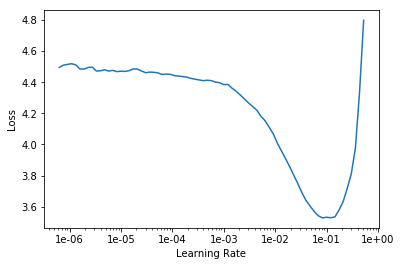

In [8]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.613724,1.948044,0.541171,1:05:54
1,1.298027,0.932552,0.729970,03:09
2,0.931896,0.696552,0.781374,03:08
3,0.781588,0.591861,0.814215,03:07
4,0.692182,0.532372,0.829922,03:08
5,0.638926,0.490396,0.845312,03:06
6,0.590835,0.458762,0.853720,03:07
7,0.552853,0.441949,0.858480,03:07
8,0.534565,0.434383,0.861495,03:10
9,0.519688,0.433842,0.862605,03:08


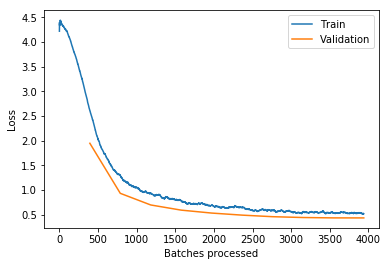

In [9]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-1')

In [0]:
learn.load(path/'Stage-1');

In [13]:
learn.fit_one_cycle(2, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.568574,0.435970,0.862129,03:09
1,0.523881,0.428006,0.864668,03:13


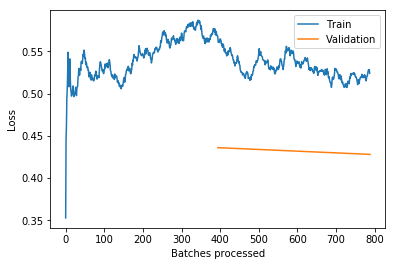

In [14]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


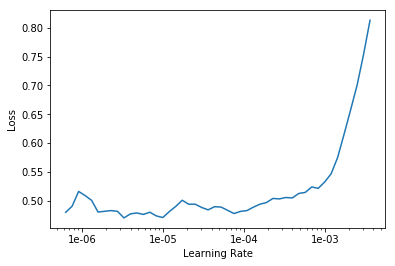

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, slice(1e-5, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.476536,0.387699,0.874346,03:14
1,0.420104,0.339136,0.890528,03:16
2,0.369364,0.302786,0.902745,03:17
3,0.296251,0.277032,0.910043,03:16
4,0.243683,0.253574,0.919086,03:14
5,0.213299,0.227315,0.929875,03:16
6,0.174821,0.223700,0.930985,03:14
7,0.137928,0.215023,0.935586,03:15
8,0.124685,0.208295,0.938125,03:16
9,0.119760,0.209749,0.937807,03:13


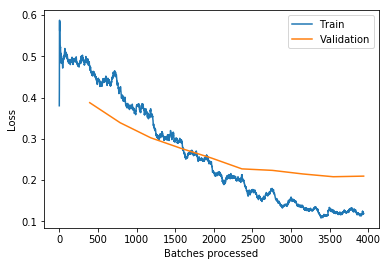

In [20]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-2')

In [0]:
data = (src.transform(get_transforms(flip_vert=True, max_warp=0), size=256)
        .databunch(bs=64)
        .normalize(imagenet_stats))

In [0]:
learn.data = data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


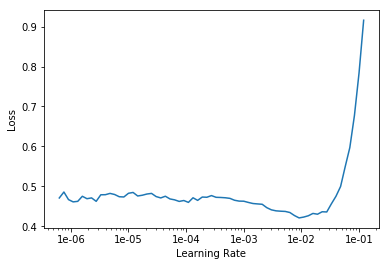

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(5, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.291479,0.266808,0.911947,05:40
1,0.230384,0.215296,0.929081,05:39
2,0.198350,0.205438,0.934317,05:38
3,0.160878,0.193072,0.937966,05:38
4,0.150924,0.195864,0.936855,05:39


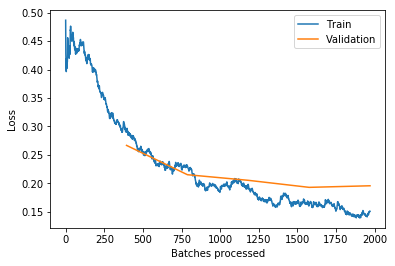

In [27]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-1_big')

In [29]:
learn.fit_one_cycle(2, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.169640,0.189613,0.940505,05:37
1,0.141824,0.183545,0.940029,05:37


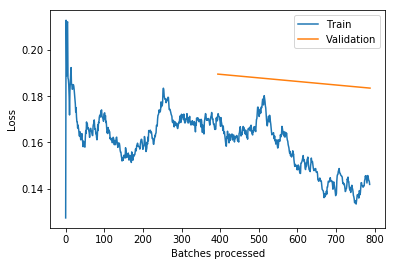

In [30]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-1_big')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


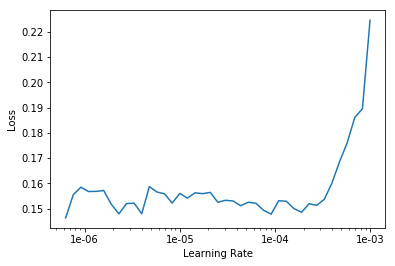

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(5, slice(3e-5, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.172625,0.208102,0.932730,06:17
1,0.204089,0.207822,0.934952,06:19
2,0.154182,0.152562,0.954307,06:14
3,0.091286,0.131155,0.959702,06:14
4,0.065052,0.122435,0.962240,06:13


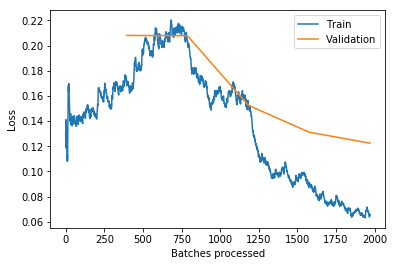

In [35]:
learn.recorder.plot_losses()

In [36]:
learn.fit_one_cycle(2, slice(3e-5, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.129056,0.173956,0.945581,06:10
1,0.068679,0.124337,0.961130,06:09


In [0]:
learn.save(path/'Stage-2_big')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [39]:
interp.most_confused()

[('church', 'palace', 9),
 ('palace', 'church', 9),
 ('railway_station', 'railway', 7),
 ('rectangular_farmland', 'terrace', 7),
 ('commercial_area', 'palace', 6),
 ('mountain', 'desert', 6),
 ('wetland', 'lake', 6),
 ('bridge', 'overpass', 5),
 ('medium_residential', 'dense_residential', 5),
 ('church', 'commercial_area', 4),
 ('industrial_area', 'commercial_area', 4),
 ('railway', 'railway_station', 4),
 ('commercial_area', 'church', 3),
 ('commercial_area', 'dense_residential', 3),
 ('dense_residential', 'medium_residential', 3),
 ('forest', 'sparse_residential', 3),
 ('lake', 'wetland', 3),
 ('overpass', 'freeway', 3),
 ('river', 'mountain', 3),
 ('runway', 'airport', 3),
 ('stadium', 'baseball_diamond', 3),
 ('airplane', 'runway', 2),
 ('basketball_court', 'tennis_court', 2),
 ('bridge', 'freeway', 2),
 ('bridge', 'ship', 2),
 ('dense_residential', 'mobile_home_park', 2),
 ('industrial_area', 'palace', 2),
 ('intersection', 'commercial_area', 2),
 ('intersection', 'overpass', 2),


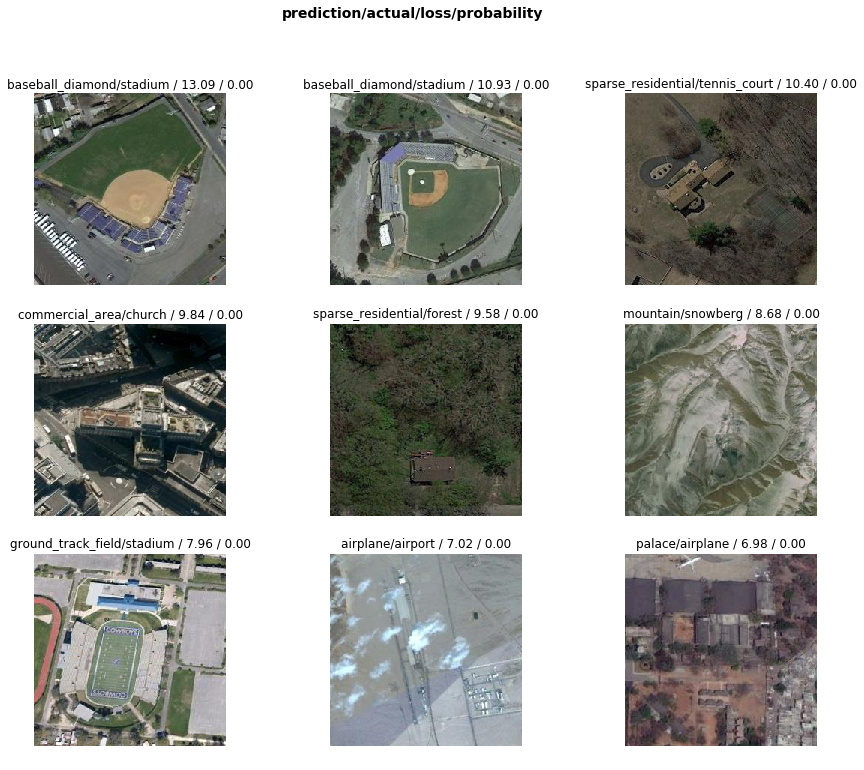

In [42]:
interp.plot_top_losses(9, figsize=(15, 12))

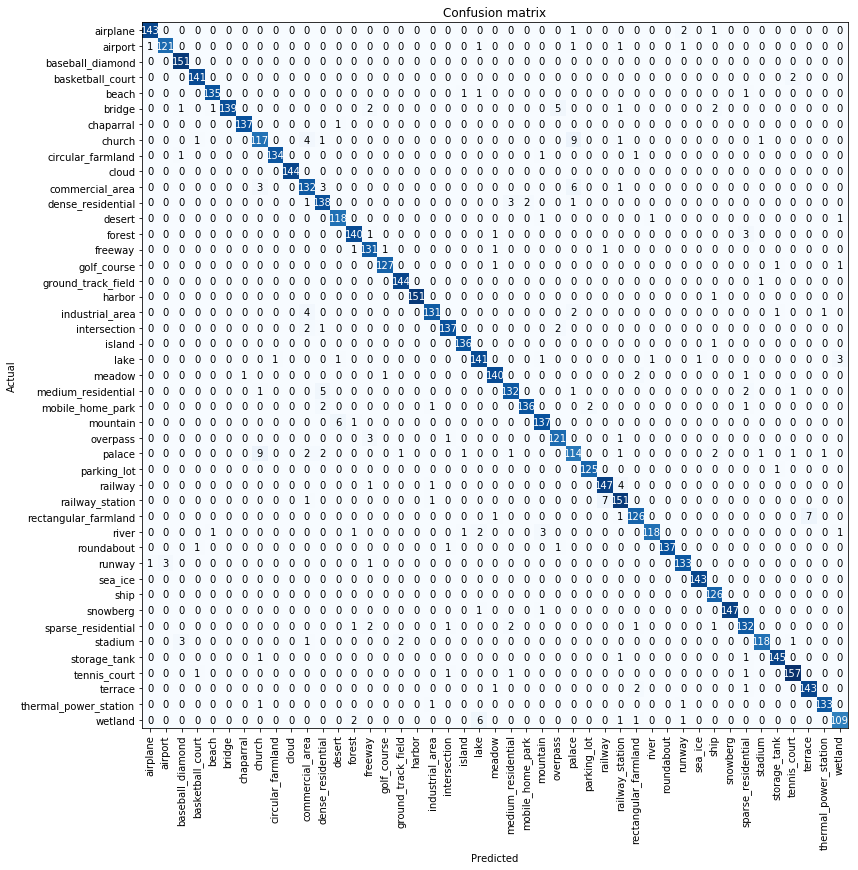

In [44]:
interp.plot_confusion_matrix(figsize=(15,12))